# Systematic Investment Final Project
### 2019 NYU Stern Spring Semester

#### Principal Investigators: Ruijie (Cherry) Cai (rc3470),  Zhiyu Chen (zc987) <br> Email: ruijiu.cai@stern.nyu.edu, zhiyu.chen@stern.nyu.edu

# Model Simulation Using All listed Stock in the Oil Industry

**Overview:** Using two Naive Bayes Classifiers (i)Bernoulli, and (ii)Gaussian to carry out the prediction.

**Important Variables:** 

- **Momentum**：Momentum measures the rate of the rise or fall in stock prices.

- **Volatility**：Statistical measure of the dispersion of returns for a given security or market index.

- **Trading Vloume**: The amount of a stock that was traded during a given period of time

- **Stock Return**: The money made or lost on an investment.


**Access**: the file for the data is from the Data_Cleaning.

In [1]:
import numpy as np                          # foundation for pandas 
import pandas as pd                         # data package
import matplotlib.pyplot as plt             # graphics module 
from sklearn.naive_bayes import BernoulliNB # Naive Bayes classifier for multivariate Bernoulli models.

In [2]:
volume = pd.read_excel('all_stock_volume.xlsx',parse_dates=True, index_col=0)

close = pd.read_excel('all_stock_close.xlsx',parse_dates=True,index_col=0)
# set close price to NAN if there was no trading volume on that day

close[(volume.isnull()) | (volume==0)] = np.nan
# calculate 5-day market momentum

# Here we labeled the trainning set using the 5 day momentum
mom = close - close.shift(5)

mom.dropna(how='all',inplace=True)

mom = mom.loc['2013/4/19':]
# label mom into 5 classes based on value

labeled_mom = mom.apply(pd.qcut, q=5, labels=False, duplicates= 'drop')

labeled_mom.head()

,000059.SZ,000637.SZ,000819.SZ,002377.SZ,600028.SH,600339.SH,600688.SH,000096.SZ,000159.SZ,000554.SZ,...,300084.SZ,300157.SZ,300164.SZ,300191.SZ,600256.SH,600583.SH,600759.SH,600871.SH,601808.SH,601857.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2013-04-26,0,0,4.0,1.0,0,0.0,0.0,1.0,0.0,1,...,0.0,NaN,NaN,3.0,0.0,1,0.0,0.0,2,1.0
2013-05-02,0,1,3.0,0.0,0,0.0,1.0,0.0,1.0,1,...,0.0,NaN,NaN,2.0,0.0,2,0.0,0.0,1,1.0
2013-05-03,2,2,4.0,1.0,3,1.0,4.0,1.0,2.0,2,...,1.0,NaN,NaN,3.0,0.0,4,1.0,4.0,3,2.0
2013-05-06,2,2,4.0,2.0,3,2.0,3.0,1.0,2.0,2,...,1.0,NaN,NaN,3.0,0.0,3,1.0,3.0,3,2.0
2013-05-07,2,2,3.0,3.0,3,3.0,4.0,2.0,3.0,2,...,3.0,NaN,NaN,3.0,3.0,4,3.0,4.0,3,2.0


In [3]:
# Here we labeled the trainning set using the trading volume

volume[(volume.isnull()) | (volume==0)] = np.nan

volume.dropna(how='all',inplace=True)

volume = volume.loc['2013/4/19':]

labeled_volume = volume.apply(pd.qcut, q=5, labels=False)

labeled_volume.head()

,000059.SZ,000637.SZ,000819.SZ,002377.SZ,600028.SH,600339.SH,600688.SH,000096.SZ,000159.SZ,000554.SZ,...,300084.SZ,300157.SZ,300164.SZ,300191.SZ,600256.SH,600583.SH,600759.SH,600871.SH,601808.SH,601857.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2013-04-19,1,3,3.0,0.0,0,1.0,0.0,2.0,0.0,0,...,0.0,NaN,NaN,2.0,0.0,2,2.0,0.0,1,1.0
2013-04-22,1,2,3.0,0.0,0,0.0,0.0,2.0,0.0,0,...,1.0,NaN,NaN,2.0,0.0,1,1.0,0.0,0,0.0
2013-04-23,1,2,3.0,0.0,1,0.0,0.0,2.0,0.0,0,...,0.0,NaN,NaN,2.0,0.0,0,1.0,0.0,1,0.0
2013-04-24,0,2,3.0,0.0,0,0.0,0.0,1.0,0.0,0,...,0.0,NaN,NaN,3.0,0.0,1,0.0,0.0,1,0.0
2013-04-25,0,1,4.0,0.0,0,0.0,0.0,1.0,0.0,0,...,0.0,NaN,NaN,2.0,0.0,1,1.0,0.0,1,0.0


In [4]:
close.sort_index(inplace=True)

ret = close.pct_change()

ret.dropna(axis=0,inplace=True, how='all')

ret = ret.loc['2013/4/19':]

ret.head()

,000059.SZ,000637.SZ,000819.SZ,002377.SZ,600028.SH,600339.SH,600688.SH,000096.SZ,000159.SZ,000554.SZ,...,300084.SZ,300157.SZ,300164.SZ,300191.SZ,600256.SH,600583.SH,600759.SH,600871.SH,601808.SH,601857.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2013-04-22,-0.010169,-0.018367,0.033668,0.018377,-0.005764,-0.013216,-0.011945,0.017582,-0.007974,-0.006652,...,0.011945,NaN,NaN,0.056093,-0.009694,-0.004644,-0.008180,-0.014778,0.001923,0.001168
2013-04-23,-0.053082,-0.041580,-0.058905,-0.039098,-0.039130,-0.035714,-0.032815,-0.047516,-0.028939,-0.022321,...,-0.042159,NaN,NaN,0.009158,-0.026275,-0.032659,-0.039175,-0.040000,-0.030710,-0.011669
2013-04-24,0.007233,0.041215,0.029455,0.004695,0.016591,0.006944,0.021429,0.018141,0.008278,0.009132,...,0.020246,NaN,NaN,0.037508,0.007407,0.011254,0.004292,0.015625,0.019142,0.004723
2013-04-25,-0.017953,-0.022917,0.052933,-0.031153,0.005935,-0.029885,-0.010490,-0.028953,-0.014778,-0.018100,...,-0.044866,NaN,NaN,-0.030321,-0.010504,-0.007949,-0.040598,-0.013675,0.013601,0.001175
2013-04-26,-0.014625,-0.004264,0.014266,-0.011254,-0.007375,-0.009479,0.001767,-0.029817,-0.016667,-0.006912,...,-0.036134,NaN,NaN,-0.013229,-0.024416,0.016026,-0.011136,0.000000,-0.007668,-0.004695


In [5]:
# Here we labeled the trainning set using the 20 day volatility

volatility = ret.rolling(20).std(ddof=0)

volatility[(volume.isnull()) | (volume==0)] = np.nan

volatility.dropna(how='all',inplace=True)

volatility = volatility.loc['2013/4/19':]

labeled_volatility = volatility.apply(pd.qcut, q=5, labels=False)

labeled_volatility.head()

,000059.SZ,000637.SZ,000819.SZ,002377.SZ,600028.SH,600339.SH,600688.SH,000096.SZ,000159.SZ,000554.SZ,...,300084.SZ,300157.SZ,300164.SZ,300191.SZ,600256.SH,600583.SH,600759.SH,600871.SH,601808.SH,601857.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2013-05-22,1,1,2.0,0.0,2,0.0,1.0,3.0,0.0,0,...,1.0,NaN,NaN,3.0,2.0,2,1.0,1.0,1,0.0
2013-05-23,1,1,2.0,0.0,2,0.0,1.0,3.0,0.0,0,...,1.0,NaN,NaN,2.0,2.0,2,1.0,1.0,1,0.0
2013-05-24,0,1,2.0,0.0,1,0.0,1.0,3.0,0.0,0,...,1.0,NaN,NaN,3.0,2.0,1,1.0,0.0,0,0.0
2013-05-27,0,0,2.0,0.0,1,0.0,1.0,3.0,0.0,0,...,1.0,NaN,NaN,3.0,2.0,2,1.0,0.0,1,0.0
2013-05-28,0,0,2.0,0.0,1,0.0,1.0,3.0,0.0,0,...,1.0,NaN,NaN,3.0,2.0,2,0.0,0.0,1,0.0


In [6]:
# label positive/nonpositive returns

labeled_ret = ret.copy()

labeled_ret[labeled_ret > 0]=1

labeled_ret[labeled_ret <= 0]=0

labeled_ret.head()

,000059.SZ,000637.SZ,000819.SZ,002377.SZ,600028.SH,600339.SH,600688.SH,000096.SZ,000159.SZ,000554.SZ,...,300084.SZ,300157.SZ,300164.SZ,300191.SZ,600256.SH,600583.SH,600759.SH,600871.SH,601808.SH,601857.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
2013-04-22,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2013-04-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2013-04-24,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2013-04-25,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2013-04-26,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
# set up for backtest
# establish a trade calendar to control the date in backtest

volume_date = pd.read_excel('all_stock_volume.xlsx',index_col=0,parse_dates=True,usecols=[0])

start_date = '2013/5/22'

end_date='2019/4/19'

volume_date.sort_index(inplace=True)

new_volume = volume_date.loc[start_date:end_date]

trade_calendar = new_volume.index

strategy_return = pd.Series(index=trade_calendar)

In [10]:
# run backtest on each historical day i
for i in range(len(trade_calendar)-2):

    # training data use day i to predict day i+!
    # prediction data use day i+1 to predict day i+2
    train_x_time = trade_calendar[i]
    
    train_y_time = trade_calendar[i+1]
    
    predict_x_time = trade_calendar[i+1]
    
    predict_y_time = trade_calendar[i+2]

    # generate training data
    # use +100/+200/+300 to distinguish features among volume, volatility and mom
    train_data = pd.DataFrame({'labeled_volume': labeled_volume.loc[train_x_time]+100,
                               'labeled_volatility': labeled_volatility.loc[train_x_time]+200,
                               'labeled_mom': labeled_mom.loc[train_x_time]+300,
                               'labeled_ret':labeled_ret.loc[train_y_time]})
    
    train_data.dropna(axis=0, inplace=True, how='any')

    # generate dummy variables
    dummy_data1 = pd.get_dummies(train_data['labeled_volume'])
    
    dummy_data2 = pd.get_dummies(train_data['labeled_volatility'])
    
    dummy_data3 = pd.get_dummies(train_data['labeled_mom'])
    
    # concat dummy variable series into a matrix train_x
    dummy_train_x = pd.concat([dummy_data1, dummy_data2, dummy_data3], axis=1)

    # read in data for prediction
    predict_data = pd.DataFrame({'labeled_volume': labeled_volume.loc[predict_x_time]+100,
                                 'labeled_volatility': labeled_volatility.loc[predict_x_time]+200,
                                 'labeled_mom': labeled_mom.loc[predict_x_time]+300,
                                 'ret':ret.loc[predict_y_time]})
    
    predict_data.dropna(axis=0, inplace=True, how='any')
    
    #  generate dummy variable based on labeled categories
    dummy_predict_data1 = pd.get_dummies(predict_data['labeled_volume'])
    
    dummy_predict_data2 = pd.get_dummies(predict_data['labeled_volatility'])
    
    dummy_predict_data3 = pd.get_dummies(predict_data['labeled_mom'])

    # concat dummy variable series into a matrix predict_x
    dummy_predict_x = pd.concat([dummy_predict_data1, dummy_predict_data2, dummy_predict_data3], axis=1)

    # adjust for different numbers of features from dummy_train_x & dummy_train_x
    data_union = dummy_train_x.columns.union(dummy_predict_x.columns)
    
    dummy_train_x = dummy_train_x.reindex(columns=data_union, fill_value=0)
    
    dummy_predict_x = dummy_predict_x.reindex(columns=data_union, fill_value=0)
    
    # train the model using Bernoulli classifier
    NB = BernoulliNB()
    
    NB.fit(dummy_train_x.values, train_data['labeled_ret'].values)
    
    prediction = NB.predict(dummy_predict_x.values)
    
    predict_data['prediction'] = prediction

    # calculate daily average returns and store values into strategy_return series
    if predict_data['prediction'].sum() == 0:
        strategy_return[predict_y_time] = 0
    else:
        strategy_return[predict_y_time] = np.average(predict_data['ret'], weights=predict_data['prediction'])

/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_

/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_

In [11]:
train_data.head()

,labeled_volume,labeled_volatility,labeled_mom,labeled_ret
000059.SZ,103.0,202.0,302.0,0.0
000637.SZ,104.0,204.0,304.0,1.0
000819.SZ,104.0,201.0,304.0,0.0
002377.SZ,103.0,202.0,300.0,0.0
600028.SH,103.0,202.0,302.0,0.0


In [12]:
dummy_train_x.head()

,100.0,101.0,102.0,103.0,104.0,201.0,202.0,203.0,204.0,300.0,301.0,302.0,303.0,304.0
000059.SZ,0,0,0,1,0,0,1,0,0,0,0,1,0,0
000637.SZ,0,0,0,0,1,0,0,0,1,0,0,0,0,1
000819.SZ,0,0,0,0,1,1,0,0,0,0,0,0,0,1
002377.SZ,0,0,0,1,0,0,1,0,0,1,0,0,0,0
600028.SH,0,0,0,1,0,0,1,0,0,0,0,1,0,0


In [13]:
predict_data.head()

,labeled_volume,labeled_volatility,labeled_mom,ret,prediction
000059.SZ,102.0,202.0,303.0,0.008032,0.0
000637.SZ,104.0,204.0,304.0,0.052901,1.0
000819.SZ,104.0,201.0,303.0,-0.011943,1.0
002377.SZ,103.0,202.0,300.0,0.012987,0.0
600028.SH,103.0,202.0,302.0,0.003419,0.0


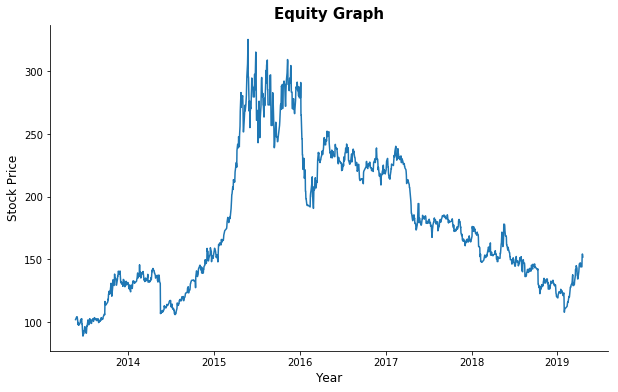

In [14]:
#draw equity graph for this strategy

fig,ax = plt.subplots(figsize=(10,6))

ax.plot(100*(strategy_return+1).cumprod(), label='strategy_return')

ax.set_title("Equity Graph", fontsize = 15, fontweight = "bold") 

ax.set_ylabel("Stock Price", fontsize = 12)

ax.set_xlabel("Year", fontsize = 12)

ax.spines["top"].set_visible(False)

ax.spines["right"].set_visible(False) 

plt.show()

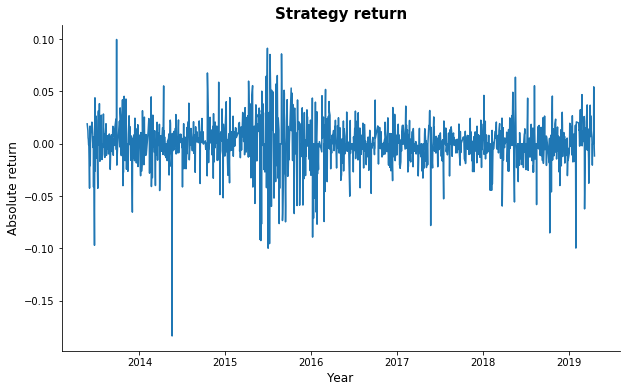

In [15]:
# strategy return

fig,ax = plt.subplots(figsize=(10,6))

ax.plot(strategy_return, label='strategy_return')

ax.set_title("Strategy return", fontsize = 15, fontweight = "bold") 

ax.set_ylabel("Absolute return", fontsize = 12)

ax.set_xlabel("Year", fontsize = 12)

ax.spines["top"].set_visible(False) 

ax.spines["right"].set_visible(False) 

plt.show()

In [16]:
# ratio serves to display different metrics that evaluates the performance of strategy
def ratio(datas):
    
    ratios = []
    
    for item in datas:
        
        data = datas[item]
        
        # sharpe ratio               
        sr = (data.mean() * 252 ** 0.5) / data.std()
        
        # number of days that the strategy wins
        num_of_up = data[data > 0].count()
        
        # number of days that the strategy loses
        num_of_down = data[data < 0].count()
        
        # win/loss ratio
        win_loss_ratio = float(num_of_up) / (num_of_up + num_of_down)
        
        # cummulative return       
        cum_ret = (data + 1).cumprod()
        
        # maximum drawdown
        drawdown = ((cum_ret.cummax() - cum_ret)/cum_ret.cummax()).max()
        
        # a temporary DataFrame for displaying result 
        temp = pd.DataFrame([sr, num_of_up, num_of_down, win_loss_ratio, drawdown], columns=[data.name], 
                            index=['Sharpe Ratio', 'Number of Up Periods', 'Number of Down Periods', 'Win/Loss Ratio','Maximum Drawdown'])
        
        ratios.append(temp)

    return pd.concat(ratios,axis=1,join='inner')

In [17]:
result = ratio(pd.DataFrame(strategy_return)).round(4)
result.columns = ['strategy_return']
result

,strategy_return
Sharpe Ratio,0.3883
Number of Up Periods,685.0000
Number of Down Periods,591.0000
Win/Loss Ratio,0.5368
Maximum Drawdown,0.6688
